## Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Loading Dataset

In [3]:
df=pd.read_csv("hotel_bookings.csv")

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## Dimensions of the Data

In [6]:
df.shape

(119390, 32)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'], format="%d/%m/%Y")

## Summary Statistics

In [9]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,...,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,...,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363,2016-07-30 00:24:47.883407104
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000,2016-02-01 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000,2016-08-07 00:00:00
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,2017-02-08 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,...,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798,NaN


In [10]:
df.describe(include="object")

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [11]:
for col in df.describe(include="object").columns:
    print(col)
    print(df[col].unique())
    print('-'*80)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DO

In [12]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [13]:
df.drop(['company','agent'],axis=1,inplace=True)
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [15]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


<Axes: >

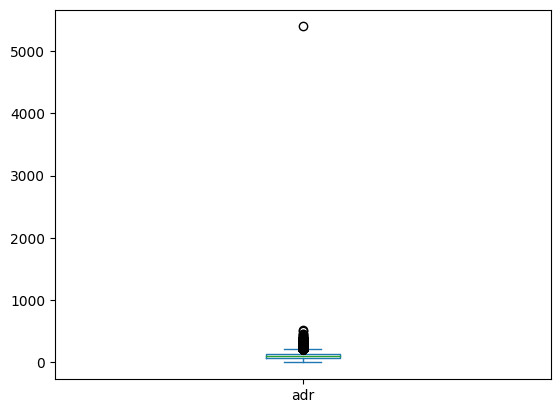

In [16]:
df['adr'].plot(kind='box')

In [17]:
df=df[df['adr']<5000]

# Data Analysis

is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64


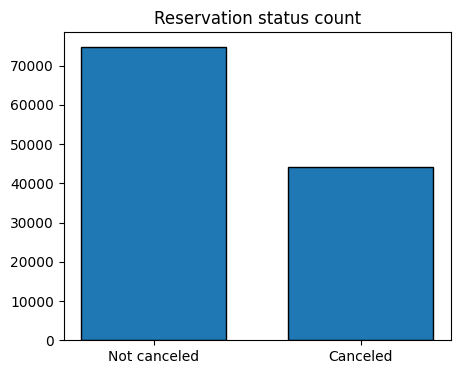

In [18]:
cancelled_perc = df['is_canceled'].value_counts(normalize = True)
print(cancelled_perc)

plt.figure(figsize = (5,4))
plt.title('Reservation status count')
plt.bar(['Not canceled','Canceled'],df['is_canceled'].value_counts(), edgecolor = 'k', width = 0.7)
plt.show()

## Cancellation Rate by Hotel Type

###### The total cancellations percentage is 37 % (inclusive of city and hotel resorts)

In [19]:
city_hotel=df[df['hotel']=='City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.582918
1    0.417082
Name: proportion, dtype: float64

In [20]:
resort_hotel=df[df["hotel"]=="Resort Hotel"]
resort_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64

##### Cancellations of City Hotel is 41.7% whereas cancellations of Resort Hotel i s 27.9%

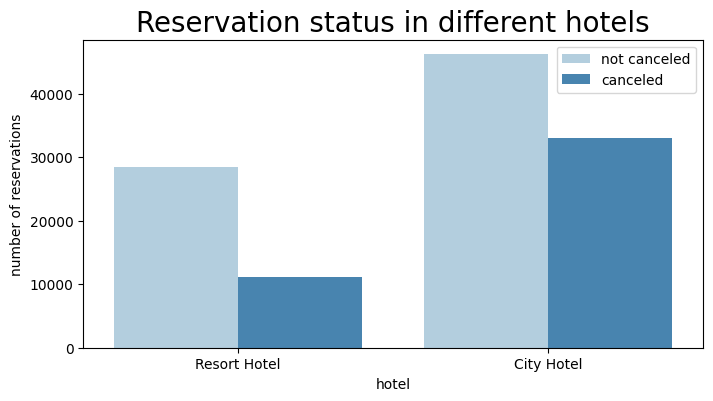

In [21]:
plt.figure(figsize = (8,4))
ax1= sns.countplot(x = 'hotel', hue = 'is_canceled', data = df, palette = 'Blues')
legend_labels,_ = ax1. get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Reservation status in different hotels', size = 20)
plt.xlabel('hotel')
plt.ylabel('number of reservations')
plt.legend(['not canceled', 'canceled'])
plt.show()


###### Cancellations are high in city hotels than resort hotels

In [22]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## Average Daily Rate in City and Resort Hotel

In [23]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)

is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64

In [24]:
city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)

is_canceled
0    0.582918
1    0.417082
Name: proportion, dtype: float64

In [25]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

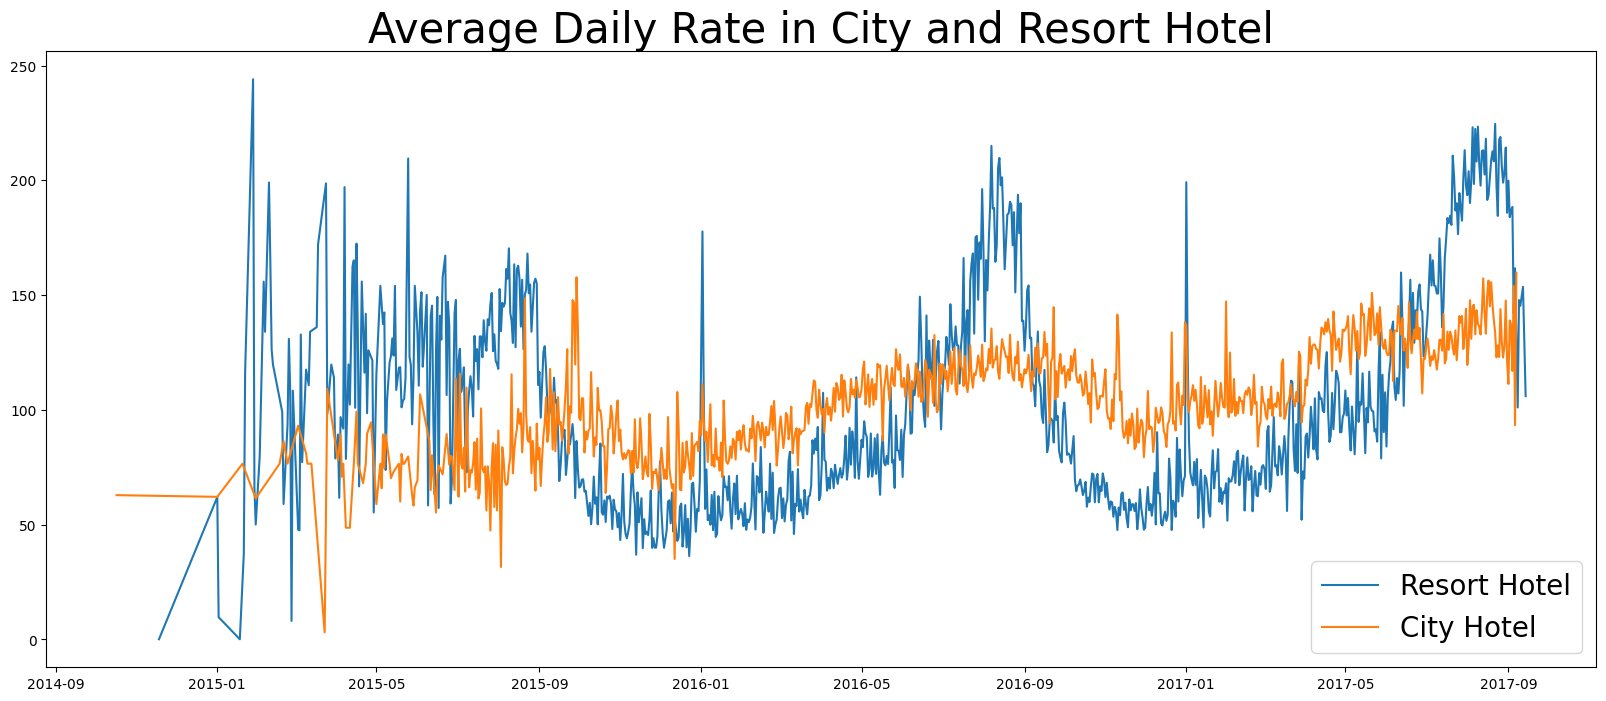

In [50]:
plt.figure(figsize = (20,8))
plt.title('Average Daily Rate in City and Resort Hotel', fontsize = 30)
plt.plot(resort_hotel.index, resort_hotel['adr'], label = 'Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label = 'City Hotel')
plt.legend(fontsize = 20)
plt.show()

## Cancellation rate over the months

In [28]:
# Bookings and Cancellations over year
bookings_over_month=df.groupby('arrival_date_month')["hotel"].count()
cancellations_over_month=df[df['is_canceled']==1].groupby("arrival_date_month").count()

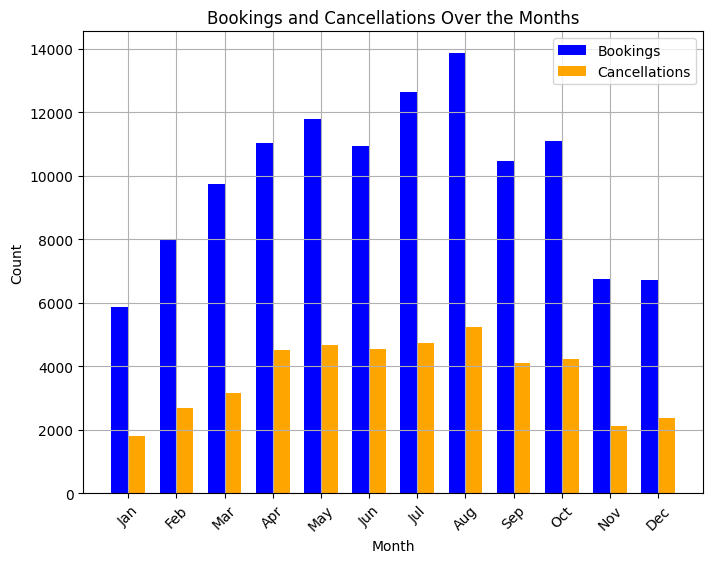

In [52]:
import calendar
import numpy as np
import matplotlib.pyplot as plt

# Grouping bookings by arrival date month and counting the number of bookings
bookings_over_month = df.groupby('arrival_date_month')['hotel'].count()

# Grouping cancellations by arrival date month and counting the number of cancellations
cancellations_over_month = df[df['is_canceled'] == 1].groupby('arrival_date_month')['hotel'].count()

# Converting month names to numerical values
month_order = [list(calendar.month_name).index(month) for month in bookings_over_month.index]
bookings_over_month = bookings_over_month.loc[calendar.month_name[1:]]
cancellations_over_month = cancellations_over_month.loc[calendar.month_name[1:]]

# Setting the width of the bars
bar_width = 0.35

# Generating the positions for the bars
r1 = np.arange(len(bookings_over_month))
r2 = [x + bar_width for x in r1]

# Plotting the grouped bar charts
plt.figure(figsize=(8, 6))
plt.grid()
plt.bar(r1, bookings_over_month.values, color='blue', width=bar_width, label='Bookings')
plt.bar(r2, cancellations_over_month.values, color='orange', width=bar_width, label='Cancellations')

# Setting chart title and labels
plt.title('Bookings and Cancellations Over the Months')
plt.xlabel('Month')
plt.ylabel('Count')

# Formatting x-axis labels
plt.xticks(r1 + bar_width / 2, calendar.month_abbr[1:], rotation=45)

# Adding a legend
plt.legend()

# Displaying the chart
plt.show()


## Countries and Cancellations 

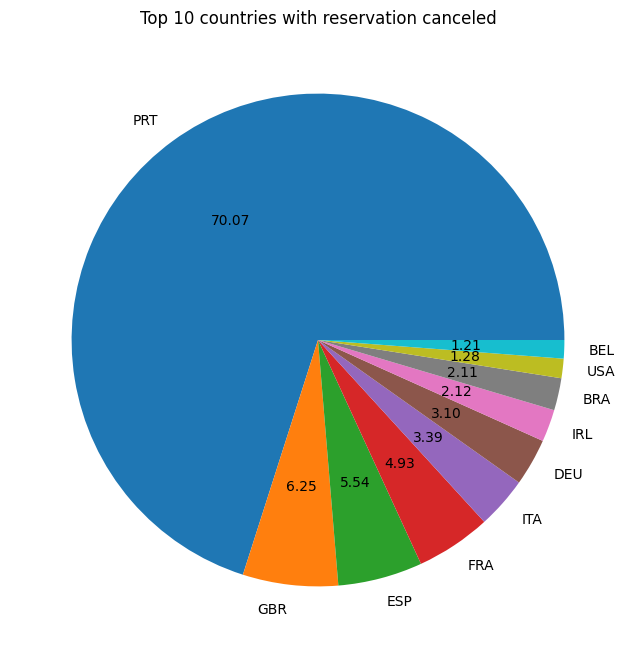

In [54]:
cancelled_data = df[df['is_canceled'] == 1]
top_10_country = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize = (8,8))
plt.title('Top 10 countries with reservation canceled')
plt.pie(top_10_country, autopct = '%.2f', labels = top_10_country.index)
plt.show()

## Lead Time and Cancellation Rates

whiskers: [18.0, 161.0]

caps: [0, 375]

boxes: [18.0]

fliers: [737]

means: []



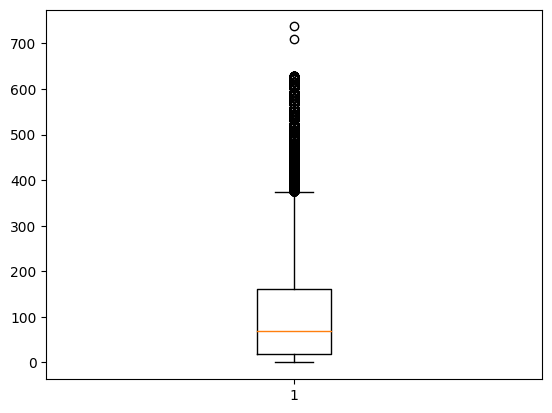

In [30]:
bp = plt.boxplot(df['lead_time'])

# Extracting information from the box plot
for key in bp.keys():
    if key != 'medians':
        print(f'{key}: {[item.get_ydata()[0] for item in bp[key]]}\n')

In [31]:
df[df['lead_time']>650]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
4182,Resort Hotel,0,709,2016,February,9,25,8,20,2,...,E,2,No Deposit,0,Transient,68.0,0,0,Check-Out,2016-03-24


In [32]:
df['lead_time'].describe()

count    118897.000000
mean        104.312018
std         106.903570
min           0.000000
25%          18.000000
50%          69.000000
75%         161.000000
max         737.000000
Name: lead_time, dtype: float64

In [71]:
# Define the bins for the groups
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, float('inf')]

# Create a new column 'lead_time_group' with the groups
df['lead_time_group'] = pd.cut(df['lead_time'], bins)

# Count the number of occurrences in each group
lead_time_groups = df['lead_time_group'].value_counts()

# Display the lead time groups
print(lead_time_groups)

lead_time_group
(0.0, 50.0]       44178
(50.0, 100.0]     21197
(100.0, 150.0]    14793
(150.0, 200.0]    11877
(200.0, 250.0]     7051
(250.0, 300.0]     5690
(300.0, 350.0]     4061
(350.0, 400.0]     1712
(400.0, 450.0]     1008
(450.0, 500.0]      625
(500.0, inf]        481
Name: count, dtype: int64


In [72]:
df['lead_time_group'].dtype

CategoricalDtype(categories=[(0.0, 50.0], (50.0, 100.0], (100.0, 150.0], (150.0, 200.0], (200.0, 250.0] ... (300.0, 350.0], (350.0, 400.0], (400.0, 450.0], (450.0, 500.0], (500.0, inf]], ordered=True)

In [73]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'lead_time_group',
       'month'],
      dtype='object')

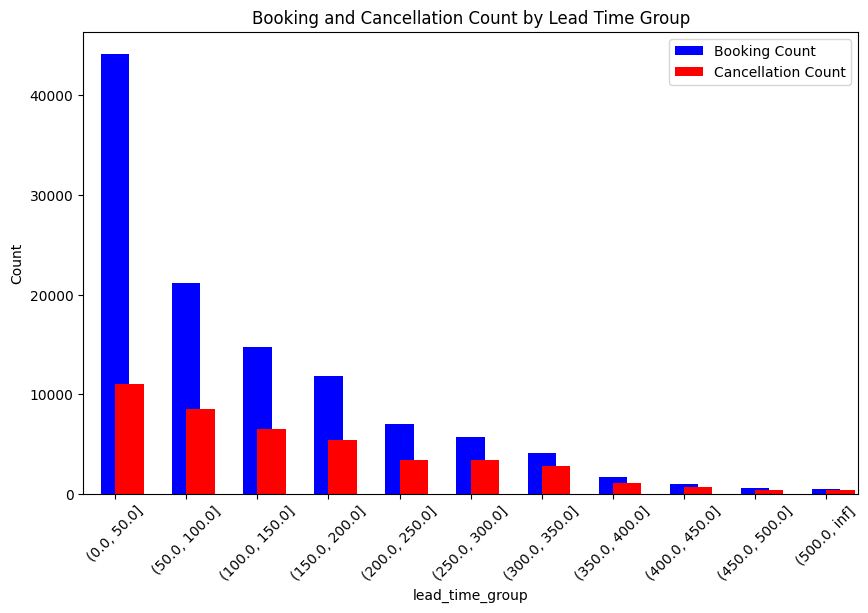

In [65]:
import matplotlib.pyplot as plt

# Group the data by lead time group and calculate the booking count
booking_count = df.groupby('lead_time_group')['is_canceled'].count()

# Group the data by lead time group and calculate the cancellation count
cancellation_count = df.groupby('lead_time_group')['is_canceled'].sum()

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Set plot title and labels
ax.set_title('Booking and Cancellation Count by Lead Time Group')
ax.set_xlabel('Lead Time Group (No. of Days booked before)')
ax.set_ylabel('Count')

# Plot booking count as grouped bar chart with color 'blue'
booking_count.plot(kind='bar', ax=ax, position=0, width=0.4, label='Booking Count', color='blue')

# Calculate the position for the cancellation count bars
cancellation_position = [p + 0.4 for p in range(len(cancellation_count))]

# Plot cancellation count as grouped bar chart with color 'red'
ax.bar(cancellation_position, cancellation_count, width=0.4, label='Cancellation Count', color='red')

# Set x-axis tick labels and positions
ax.set_xticks([p + 0.2 for p in range(len(booking_count))])
ax.set_xticklabels(booking_count.index, rotation=45)

# Add a legend
ax.legend()

# Display the plot
plt.show()


## Market Segment & Cancellation Rate

In [38]:
df['market_segment'].value_counts()

market_segment
Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: count, dtype: int64

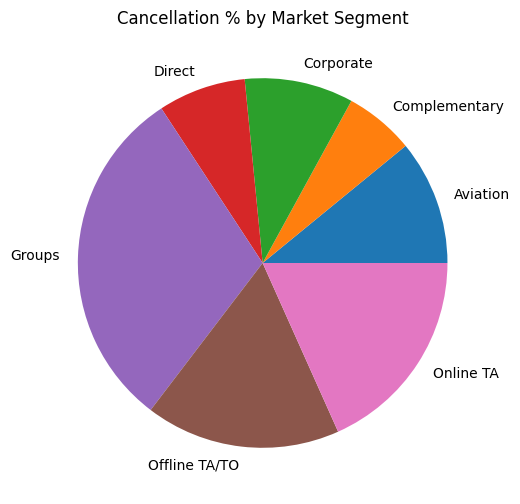

In [39]:
# Group the data by Market Segment and calculate the cancellation percentage
market_segment_cancellations = df.groupby('market_segment')['is_canceled'].sum()*100/df.groupby('market_segment')['is_canceled'].count()

# Create a bar plot to visualize the cancellation count for each lead time group
plt.figure(figsize=(10, 6))
market_segment_cancellations.plot(kind='pie')

# Set plot title
plt.title('Cancellation % by Market Segment')
plt.ylabel("")

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

## Distribution Channel & Cancellation Rate

In [40]:
df.groupby('distribution_channel')['is_canceled'].sum()
df=df[df['distribution_channel']!="Undefined"]

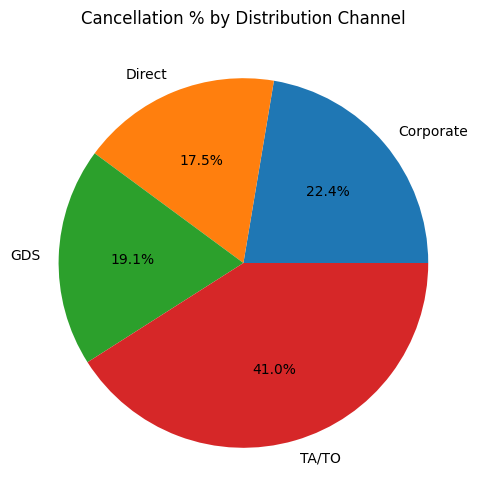

In [41]:
import matplotlib.pyplot as plt

# Group the data by Distribution Channel and calculate the cancellation percentage
distribution_channel_cancellations = df.groupby('distribution_channel')['is_canceled'].sum()*100/df.groupby('distribution_channel')['is_canceled'].count()

# Create a bar plot to visualize the cancellation count for each lead time group
plt.figure(figsize=(10, 6))
pie = plt.pie(distribution_channel_cancellations, labels=distribution_channel_cancellations.index, autopct='%1.1f%%')

# Add values to the pie chart
for value in pie[2]:
    value.set_text(f'{value.get_text()}')

# Set plot title
plt.title('Cancellation % by Distribution Channel')
plt.ylabel("")

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()


## Booking Changes and Cancellation 

In [42]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'lead_time_group'],
      dtype='object')

In [43]:
df.groupby('booking_changes')['is_canceled'].count()

booking_changes
0     100901
1      12638
2       3790
3        925
4        375
5        118
6         63
7         31
8         17
9          8
10         6
11         2
12         2
13         5
14         5
15         3
16         2
17         2
18         1
20         1
21         1
Name: is_canceled, dtype: int64

## Deposit Type and Cancellation

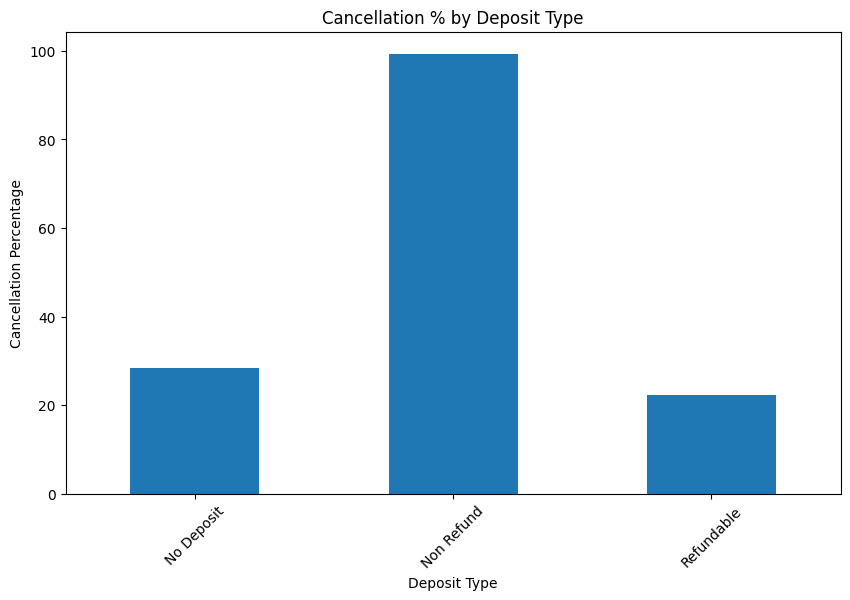

In [45]:
import matplotlib.pyplot as plt

# Group the data by Distribution Channel and calculate the cancellation percentage
deposit_type_cancellations = df.groupby('deposit_type')['is_canceled'].sum()*100/df.groupby('deposit_type')['is_canceled'].count()

# Create a bar plot to visualize the cancellation count for each lead time group
plt.figure(figsize=(10, 6))
deposit_type_cancellations.plot(kind='bar')

# Set plot title and labels
plt.title('Cancellation % by Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('Cancellation Percentage')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [46]:
deposit_type_cancellations

deposit_type
No Deposit    28.452795
Non Refund    99.361790
Refundable    22.222222
Name: is_canceled, dtype: float64

###### Non Refund deposit type has an extremely high cancellation rate of 99.36%. This indicates that bookings with non-refundable deposits are highly likely to be canceled, suggesting that customers may face circumstances that prevent them from honoring their bookings even if they have made a deposit. Efforts are to be made to know the reasons why people go to such extent to cancel their bookings 

In [47]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'lead_time_group'],
      dtype='object')

In [74]:
Count_for_unexpected_rooms=df[df['reserved_room_type']!=df['assigned_room_type']]['is_canceled'].count()

In [75]:
Cancellations_for_unexpected_rooms=df[df['reserved_room_type']!=df['assigned_room_type']]['is_canceled'].sum()

In [76]:
Cancellations_for_unexpected_rooms*100/Count_for_unexpected_rooms

5.394924824818015

###### Only 5.39 % cancellations have been done because the rooms reserved by the customers at the time of booking is different from the ones they had got at the time of stay

###### No Deposit bookings have a relatively lower cancellation rate of 28.45%. This suggests that customers who do not make a deposit are less likely to cancel their bookings. However, it is important to note that some of these cancellations could still occur closer to the arrival date, resulting in potential revenue loss for the hotel.

###### Refundable bookings have a cancellation rate of 22.22%. While this cancellation rate is lower compared to the other deposit types, it is still significant. It may indicate that even with the option of a refundable deposit, some customers still choose to cancel their bookings. Further analysis is required to understand the reasons behind these cancellations and explore strategies to reduce them.